In [1]:
from funcs import *
from multi_funcs import *

In [64]:
results = simulate(1000, 5000, 3)

In [65]:
def obtain_n_diffs(results):
    '''
    Takes the results from a batch of simulations
    and returns a list of tuples. Where first term is the difference, second term is the length of initial matches. 
    '''
    relevant = [[item[1], item[4]] for item in results]
    differences = [(len(find_diff(item[0], item[1])), len(item[0])) for item in relevant]
    percent_diff = [item[0]/item[1] for item in differences]
    return differences, percent_diff

In [66]:
differences, pct_diff = obtain_n_diffs(results)

In [67]:
df = make_df(5000, 3, differences, pct_diff, save = True)

In [68]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('data/simulations/')]

In [69]:
def concat(list_of_files):
    '''
    Takes a list of files and concatenates them into a single dataframe
    '''
    li = []
    for filename in list_of_files:
        df = pd.read_csv('data/simulations/' + filename, index_col=None, header=0)
        li.append(df)

    frame = pd.concat(li, axis=0, ignore_index=True)
    return frame

In [70]:
df = concat(onlyfiles)

In [71]:
import seaborn as sns

In [72]:
df

,Unnamed: 0,n,k,differences,percent_diff,matches
0,0,10000,3,956,0.113959,8389
1,1,10000,3,1052,0.125702,8369
2,2,10000,3,1162,0.137515,8450
3,3,10000,3,1002,0.119201,8406
4,4,10000,3,1034,0.122555,8437
...,...,...,...,...,...,...
9995,995,500,5,54,0.130120,415
9996,996,500,5,48,0.116223,413
9997,997,500,5,94,0.219114,429
9998,998,500,5,80,0.189573,422


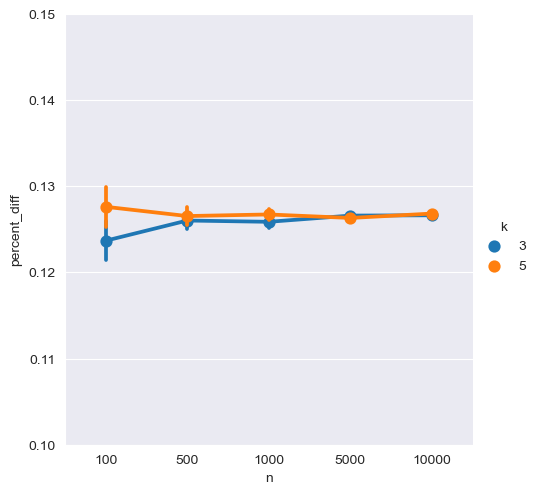

In [73]:
sns.set_style('darkgrid')
g = sns.catplot(x = 'n', y = 'percent_diff', data = df, kind = 'point', errorbar = 'se', hue = 'k')
g.set(ylim = (0.1,.15))